<div style="text-align: center; font-size: 25pt"> Homework 5 </div>

# Load package

In [2]:
# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# you may add more if you need

# Skewed data

In [3]:
# load the online user followers data
user_follower = pd.read_csv("./online_user_followers.csv")
print(user_follower.shape)
user_follower.head()

(215464, 4)


,user_name,user_created,user_followers,user_friends
0,MyNewsNE,24-05-2020 10:18,64.0,11.0
1,Shubham Gupta,14-08-2020 16:42,1.0,17.0
2,Journal of Infectiology,14-12-2017 07:07,143.0,566.0
3,Zane,18-09-2019 11:01,29.0,25.0
4,Ann-Maree O’Connor,24-01-2013 14:53,83.0,497.0


<font color='red'>**Question:**</font> The ``user_followers`` and ``user_friends`` have missing values: 

At first, try to remove the missing rows for ``user_followers``,

Then, try to fill the missing values with 0 for ``user_friends``.

In [4]:
user_follower = user_follower.loc[user_follower.user_followers.isnull() == False]
user_follower["user_friends"].fillna(0,inplace = True)

<font color='red'>**Question:**</font> Show the min, 25% percentile, median, 75% percentile, max, mean and the stardard deviations of ``user_followers``.

In [5]:
print("Min:",user_follower["user_followers"].min())
print("25% percentile:",user_follower["user_followers"].quantile(.25))
print("Median",user_follower["user_followers"].median())
print("75% percentile:",user_follower["user_followers"].quantile(.75))
print("Max:",user_follower["user_followers"].max())
print("Mean:",user_follower["user_followers"].mean())
print("Standard Deviation:",user_follower["user_followers"].std())

Min: 0.0
25% percentile: 121.0
Median 509.0
75% percentile: 2123.0
Max: 16270203.0
Mean: 44859.586354310755
Standard Deviation: 609132.4231951021


<font color='red'>**Question:**</font> Make a histogram with linear binning for ``user_followers``, try to choose a proper number of bins.

Text(0,0.5,'Count')

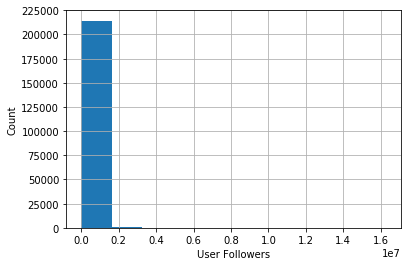

In [6]:
a = user_follower["user_followers"].hist(bins = 10)
a.set_xlabel("User Followers")
a.set_ylabel("Count")

<font color='red'>**Question:**</font> Make a histogram with logarithmic binning for ``user_followers``. Because the values has lots of zeros, we need to make a translation by adding 1 for each value, i.e., make the histogram for ``user_followers``+1.

Text(0,0.5,'Count')

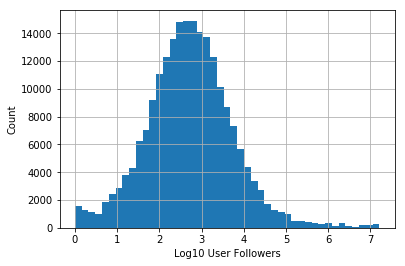

In [7]:
a = np.log10(user_follower["user_followers"] + 1).hist(bins = 45)
a.set_xlabel("Log10 User Followers")
a.set_ylabel("Count")

<font color='red'>**Question:**</font> Show the PDF, CDF and CCDF for ``user_followers``+1 using the logarithmic binning.

Text(0,0.5,'C.C.D.F.')

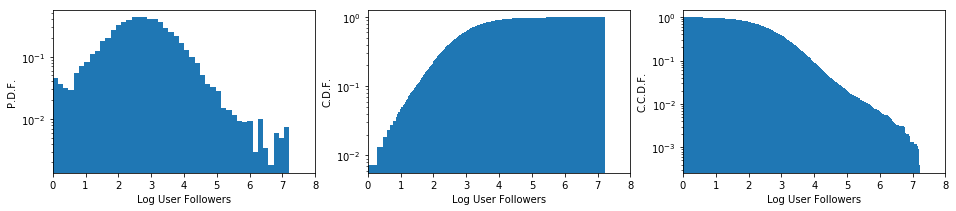

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 3))
ax1 = axes[0]
ax1.hist(np.log10(user_follower["user_followers"] + 1), 45, density=True, cumulative=False, log=True)
ax1.set_xlim(0,8)
ax1.set_xlabel("Log User Followers")
ax1.set_ylabel("P.D.F.")

ax2 = axes[1]
ax2.hist(np.log10(user_follower["user_followers"] + 1), 256, density=True, cumulative=True, log=True)
ax2.set_xlim(0,8)
ax2.set_xlabel("Log User Followers")
ax2.set_ylabel("C.D.F.")

ax3 = axes[2]
ax3.hist(np.log10(user_follower["user_followers"] + 1), 256, density=True, cumulative=-1, log=True)
ax3.set_xlim(0,8)
ax3.set_xlabel("Log User Followers")
ax3.set_ylabel("C.C.D.F.")

<font color='red'>**Question:**</font> For the ``user_friends`` values, try to convert it to float values.

Hint: the values may contain strings that are not numbers, you need to convert them to ``NAN``, then drop the missing values.

In [9]:
user_follower["user_friends"] = user_follower["user_friends"].apply(pd.to_numeric, errors='coerce')
user_follower = user_follower.loc[~user_follower.user_friends.isna()].copy()

# Check whether the conversion is successful
user_follower.loc[user_follower.user_followers.map(lambda x: type(x) == type(1.0))]

,user_name,user_created,user_followers,user_friends
0,MyNewsNE,24-05-2020 10:18,64.0,11.0
1,Shubham Gupta,14-08-2020 16:42,1.0,17.0
2,Journal of Infectiology,14-12-2017 07:07,143.0,566.0
3,Zane,18-09-2019 11:01,29.0,25.0
4,Ann-Maree O’Connor,24-01-2013 14:53,83.0,497.0
5,Raunak Scherbatsky DankWorth,03-08-2020 13:39,3.0,27.0
6,Rajesh Tadepalli,07-05-2013 03:57,918.0,2561.0
7,AKisASocialisolationist wash yer damn hands,07-02-2015 07:24,2321.0,3236.0
8,Dr. Joseph Santoro,17-01-2009 21:10,19091.0,20986.0
9,VUMC OAP,16-03-2017 20:22,282.0,96.0


<font color='red'>**Question:**</font>  Make a histogram with logarithmic binning for ``user_friends``+1. 

Text(0,0.5,'Count')

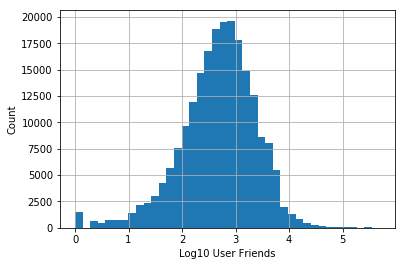

In [10]:
a = np.log10(np.abs(user_follower["user_friends"]) + 1).hist(bins = 40)
a.set_xlabel("Log10 User Friends")
a.set_ylabel("Count")

# Network data

**Data Description:**

**Character Interaction Networks for the HBO Series "Game of Thrones"**

The network data contains the nodes ``(got-s1-nodes.csv)`` and edges ``(got-s1-edges.csv)`` for the season one series.

Pairs of characters are connected by (undirected) edges weighted by the number of interactions.

There are five interaction types. Character A and Character B are connected whenever:

1. Character A speaks directly after Character B
1. Character A speaks about Character B
1. Character C speaks about Character A and Character B
1. Character A and Character B are mentioned in the same stage direction
1. Character A and Character B appear in a scene together


<font color='red'>**Question:**</font>  Create the ``Adjacency List`` for this network using the edge data: ``got-s1-edges.csv``. 
Print the adjacency list for ``Ned`` and ``Cersei``.

In [11]:
# your code here
edge = pd.read_csv('got-s1-edges.csv')
node = pd.read_csv('got-s1-nodes.csv')

df = np.array(edge)
adjacencylist = {}

for source,target,weight,season in df:
    if(source not in adjacencylist):
        adjacencylist[source] = set()
    if(target not in adjacencylist):
        adjacencylist[target] = set()
    adjacencylist[source].add(target)
    adjacencylist[target].add(source)

print(adjacencylist["NED"])
print(adjacencylist["CERSEI"])

{'ROOSE_BOLTON', 'VARYS', 'CATELYN', 'BRAN', 'RODRIK', 'BENJEN', 'MYCAH', 'LYANNA', 'MOUNTAIN', 'TYWIN', 'PYP', 'WILL', 'LANCEL', 'AERYS', 'TYRION', 'BRANDON_STARK', 'VARLY', 'BARRISTAN', 'SANSA', 'LITTLEFINGER', 'BERIC', 'JANOS', 'GENDRY', 'JAIME', 'RENLY', 'ROS', 'CERSEI', 'BAELOR', 'MHAEGEN', 'RICKARD_STARK', 'ILYN_PAYNE', 'DAENERYS', 'THEON', 'ROBERT', 'TOMARD', 'SYRIO_FOREL', 'LORAS', 'GREATJON_UMBER', 'STANNIS', 'PYCELLE', 'JOFFREY', 'JON', 'ROBB', 'TOBHO_MOTT', 'JON_ARRYN', 'JEOR', 'JORY_CASSEL', 'ARYA', 'HOUND', 'JORAH', 'HIGH_SEPTON', 'SEPTA_MORDANE', 'MAESTER_LUWIN', 'MERYN_TRANT', 'HUGH_OF_THE_VALE', 'YOREN', 'STEFFON'}
{'CATELYN', 'VARYS', 'BRAN', 'BENJEN', 'LYANNA', 'TYWIN', 'LANCEL', 'TYRION', 'BARRISTAN', 'SANSA', 'LITTLEFINGER', 'JAIME', 'RENLY', 'ROS', 'BAELOR', 'ILYN_PAYNE', 'ROBERT', 'STANNIS', 'PYCELLE', 'JOFFREY', 'JON', 'ROBB', 'JON_ARRYN', 'JEOR', 'HOUND', 'ARYA', 'MERYN_TRANT', 'YOREN', 'NED'}


<font color='red'>**Question:**</font> For each character (node) $i$, calculate the number of nodes connected to it, denote as $k_i$. Then make a histgram of the distribution of $k_i$ for all nodes.

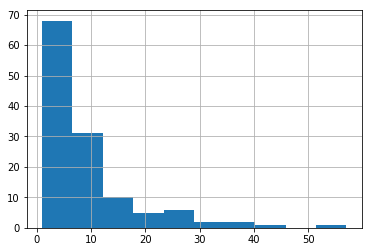

In [17]:
# your code here
k = []
for i in adjacencylist:
    k.append(len(adjacencylist[i]))

pd.Series(k).hist()

# The End